Coeficientes b: [ 0.55979398  0.         -2.2391759   0.          3.35876385  0.
 -2.2391759   0.          0.55979398]
Coeficientes a: [ 1.         -0.49401762 -2.74104783  0.94030607  3.04723869 -0.64685113
 -1.57145979  0.15479744  0.31337125]


/tmp/ipython-input-528533560.py:42: RuntimeWarning: divide by zero encountered in log10
  ax[0].plot(freq, 20*np.log10(abs(h)), color='royalblue')


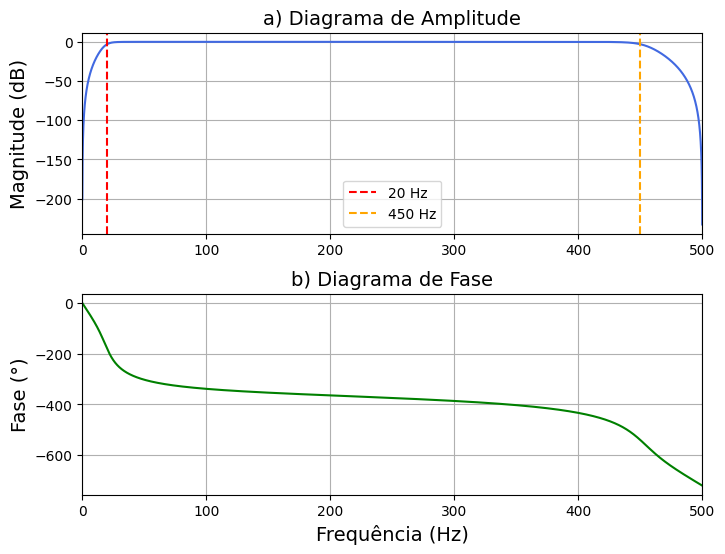

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# ================================================================
# 1) DEFINIÇÃO DA TAXA DE AMOSTRAGEM
# ---------------------------------------------------------------
# A taxa de amostragem (fs) é um parâmetro fundamental para o
# projeto digital do filtro. Ela deve ser maior que o dobro da
# maior frequência que se deseja analisar (Teorema de Nyquist).
# ================================================================
fs = 1000  # Hz — ajuste conforme sua aplicação EMG

# ================================================================
# 2) PARÂMETROS DO FILTRO BUTTERWORTH
# ---------------------------------------------------------------
# Aqui é determinado:
#   - a ordem do filtro (N)
#   - a banda de passagem (20 a 450 Hz)
# As frequências são normalizadas pela frequência de Nyquist (fs/2)
# pois o SciPy exige valores entre 0 e 1.
# ================================================================
N = 4  # ordem do filtro butterworth

Wn = [
    20 / (fs / 2),   # frequência de corte passa-alta normalizada
    450 / (fs / 2)   # frequência de corte passa-baixa normalizada
]

# ================================================================
# 3) GERAR COEFICIENTES DO FILTRO
# ---------------------------------------------------------------
# Aqui é criado um filtro Butterworth passa-banda usando SciPy.
# A saída consiste nos vetores 'b' e 'a' correspondentes à
# equação geral do filtro IIR.
# Esses coeficientes serão utilizados na IDE do Arduino
# ================================================================
b_butter, a_butter = signal.butter(
    N,
    Wn,
    btype='bandpass',
    analog=False
)

print("Coeficientes b:", b_butter)
print("Coeficientes a:", a_butter)

# ================================================================
# 4) GERAR DIAGRAMA DE BODE (AMPLITUDE + FASE)
# ---------------------------------------------------------------
# A função freqz() retorna:
#   - freq: vetor de frequências analisadas
#   - h: resposta em frequência do filtro
#
# A seguir, é gerado:
#   a) Diagrama de amplitude (em dB)
#   b) Diagrama de fase (em graus)
# para visualizar o comportamento do filtro.
# ================================================================
freq, h = signal.freqz(b_butter, a_butter, worN=8000, fs=fs)

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.3)

# Magnitude
ax[0].plot(freq, 20*np.log10(abs(h)), color='royalblue')
ax[0].set_title("a) Diagrama de Amplitude", size=14)
ax[0].set_ylabel("Magnitude (dB)", size=14)
ax[0].axvline(20, color='red', linestyle='--', label="20 Hz")
ax[0].axvline(450, color='orange', linestyle='--', label="450 Hz")
ax[0].set_xlim([0, 500])
ax[0].grid(True)
ax[0].legend()

# Fase
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_title("b) Diagrama de Fase", size=14)
ax[1].set_ylabel("Fase (°)", size=14)
ax[1].set_xlabel("Frequência (Hz)", size=14)
ax[1].set_xlim([0, 500])
ax[1].grid(True)

# Salvar em PDF
plt.savefig("bode_butterworth.pdf", format="pdf", bbox_inches='tight')

plt.show()


In [ ]:
emg_filtrado = signal.filtfilt(b_butter, a_butter, emg)